# TensorFlow Checkpoint

This assessment covers building and training a `tf.keras` `Sequential` model, then applying regularization.  The dataset comes from a ["don't overfit" Kaggle competition](https://www.kaggle.com/c/dont-overfit-ii).  There are 300 features labeled 0-299, and a binary target called "target".  There are only 250 records total, meaning this is a very small dataset to be used with a neural network. 

_You can assume that the dataset has already been scaled._

N.B. You may get comments from keras/ternsorflow regarding your kernel and runtime. These are completely normal and are informative comments, rather than warnings.

In [35]:
# Run this cell without changes
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

## 1) Prepare Data for Modeling

* Using `pandas`, open the file `data.csv` as a DataFrame
* Drop the `"id"` column, since this is a unique identifier and not a feature
* Separate the data into `X` (a DataFrame with all columns except `"target"`) and `y` (a Series with just the `"target"` column)
* The train-test split should work as-is once you create these variables

In [36]:
# Replace None with appropriate code

# Read in the data
df = pd.read_csv("data.csv")

# Drop the "id" column
del df['id']

# Separate into X and y
X = df.loc[:, df.columns != 'target']
y = df['target']

# Test/train split (set the random state to 2021) and check the X_Train shape
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2021)
df.head()

,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,-0.443,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,0.557,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,0.0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,-0.624,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,1.0,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,-0.118,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,0.0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,-0.656,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643


In [37]:
# Run this code block without any changes

# Assert

assert type(df) == pd.DataFrame
assert type(X) == pd.DataFrame
assert type(y) == pd.Series

assert X_train.shape == (187, 300)
assert y_train.shape == (187,)

## 2) Instantiate a `Sequential` Model

In the cell below, create an instance of a `Sequential` model ([documentation here](https://keras.io/guides/sequential_model/)) called `dense_model` with a `name` of `"dense"` and otherwise default arguments.

*In other words, create a model without any layers. We will add layers in a future step.*

In [38]:
# Replace None with appropriate code

from tensorflow.keras.models import Sequential

dense_model = Sequential(name = 'dense')

In [39]:
# Run this code without change

# Assert

assert len(dense_model.layers) == 0
assert type(dense_model) == Sequential
assert dense_model.name == "dense"


## 3) Determine Input and Output Shapes

How many input and output nodes should this model have?

Feel free to explore the attributes of `X` and `y` to determine this answer, or just to enter numbers based on the problem description above.

In [40]:
# Replace None with appropriate code

num_input_nodes = 300
num_output_nodes = 1

In [41]:
# Run this code without change

# Both values should be integers
assert type(num_input_nodes) == int
assert type(num_output_nodes) == int

score = 0

# 300 features, so 300 input nodes
if num_input_nodes == 300:
    score += 0.5
    
# binary output, so 1 output node
if num_output_nodes == 1:
    score += 0.5
elif num_output_nodes == 2:
    # Partial credit for this answer, since it's technically
    # possible to use 2 output nodes for this, although it's
    # confusingly redundant
    score += 0.25

score

1.0

The code below will use the input and output shapes you specified to add `Dense` layers to the model:

In [42]:
# Run this cell without changes

# Add input layer
dense_model.add(Dense(units=64, input_shape=(num_input_nodes,)))

# Add hidden layers
dense_model.add(Dense(units=64))
dense_model.add(Dense(units=64))

dense_model.layers

## 4) Add an Output Layer

Specify an appropriate activation function ([documentation here](https://keras.io/api/layers/activations/)).

We'll simplify the problem by specifying that you should use the string identifier for the function, and it should be one of these options:

* `sigmoid`
* `softmax`

***Hint:*** is this a binary or a multi-class problem? This should guide your choice of activation function.

In [43]:
# Replace None with appropriate code

activation_function = 'sigmoid'

In [44]:
# Run this cell without changes

# activation_function should be a string
assert type(activation_function) == str

if num_output_nodes == 1:
    assert activation_function == "sigmoid"
else:
    # The number of output nodes _should_ be 1, but we'll
    # give credit for a matching function even if the
    # previous answer was incorrect
    assert activation_function == "softmax"

Now we'll use that information to finalize the model.

If this code produces an error, consider restarting the kernel and re-running the code above. If it still produces an error, that is an indication that one or more of your answers above is incorrect.

In [45]:
# Run this cell without changes

# Add output layer
dense_model.add(Dense(units=num_output_nodes, activation=activation_function))

# Determine appropriate loss function
if num_output_nodes == 1:
    loss = "binary_crossentropy"
else:
    loss = "categorical_crossentropy"

# Compile model
dense_model.compile(
    optimizer="adam",
    loss=loss,
    metrics=["accuracy"]
)

dense_model.summary()

Model: "dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                19264     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 65        
Total params: 27,649
Trainable params: 27,649
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Replace None as necessary

# Fit the model to the training data, using a subset of the
# training data as validation data
dense_model_results = dense_model.fit(
    x=X_train,
    y=y_train,
    batch_size=65,
    epochs=10,
    verbose=True,
    validation_split=0.4,
    shuffle=True
)

Epoch 1/10
2/2 [==============================] - 0s 43ms/step - loss: 0.9204 - accuracy: 0.5714 - val_loss: 0.8565 - val_accuracy: 0.5200
Epoch 2/10
2/2 [==============================] - 0s 8ms/step - loss: 0.6244 - accuracy: 0.6875 - val_loss: 0.8268 - val_accuracy: 0.5733
Epoch 3/10
2/2 [==============================] - 0s 7ms/step - loss: 0.4559 - accuracy: 0.7946 - val_loss: 0.8252 - val_accuracy: 0.5733
Epoch 4/10
2/2 [==============================] - 0s 8ms/step - loss: 0.3577 - accuracy: 0.8661 - val_loss: 0.8379 - val_accuracy: 0.5867
Epoch 5/10
2/2 [==============================] - 0s 6ms/step - loss: 0.2893 - accuracy: 0.9018 - val_loss: 0.8640 - val_accuracy: 0.6267
Epoch 6/10
2/2 [==============================] - 0s 7ms/step - loss: 0.2322 - accuracy: 0.9375 - val_loss: 0.8985 - val_accuracy: 0.6267
Epoch 7/10
2/2 [==============================] - 0s 6ms/step - loss: 0.1852 - accuracy: 0.9554 - val_loss: 0.9417 - val_accuracy: 0.5733
Epoch 8/10
2/2 [=================

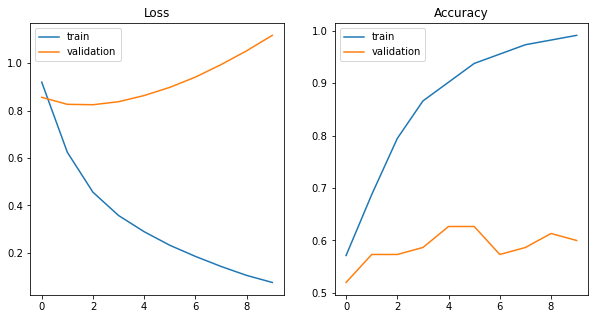

In [47]:
# Run this cell without changes

def plot_loss_and_accuracy(results, final=False):
    
    if final:
        val_label="test"
    else:
        val_label="validation"

    # Extracting metrics from model fitting
    train_loss = results.history['loss']
    val_loss = results.history['val_loss']
    train_accuracy = results.history['accuracy']
    val_accuracy = results.history['val_accuracy']

    # Setting up plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plotting loss info
    ax1.set_title("Loss")
    sns.lineplot(x=results.epoch, y=train_loss, ax=ax1, label="train")
    sns.lineplot(x=results.epoch, y=val_loss, ax=ax1, label=val_label)
    ax1.legend()

    # Plotting accuracy info
    ax2.set_title("Accuracy")
    sns.lineplot(x=results.epoch, y=train_accuracy, ax=ax2, label="train")
    sns.lineplot(x=results.epoch, y=val_accuracy, ax=ax2, label=val_label)
    ax2.legend()
    
plot_loss_and_accuracy(dense_model_results)

## 5) Modify the Code Below to Use Regularization


The model appears to be overfitting. To deal with this overfitting, modify the code below to include regularization in the model. You can add L1, L2, both L1 and L2, or dropout regularization.

Hint: these might be helpful

 - [`Dense` layer documentation](https://keras.io/api/layers/core_layers/dense/)
 - [`regularizers` documentation](https://keras.io/regularizers/)
 
(`EarlyStopping` is a type of regularization that is not applicable to this problem framing, since it's a callback and not a layer.)

In [48]:
# Complete the following code

def build_model_with_regularization(n_input, n_output, activation, loss):
    """
    Creates and compiles a tf.keras Sequential model with two hidden layers
    This time regularization has been added
    """
    # create classifier
    classifier = Sequential(name="regularized")

    # add input layer
    classifier.add(Dense(units=64, input_shape=(n_input,),
                         kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))

    # add hidden layers
    classifier.add(Dense(units=64))
    classifier.add(Dense(units=64))

    # add output layer
    classifier.add(Dense(units=n_output, activation=activation))

    classifier.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    return classifier

model_with_regularization = build_model_with_regularization(
    num_input_nodes, num_output_nodes, activation_function, loss
)
model_with_regularization.summary()

Model: "regularized"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                19264     
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 65        
Total params: 27,649
Trainable params: 27,649
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Run the code below without change

# Testing function to build model
assert type(model_with_regularization) == Sequential

def check_regularization(model):
    regularization_count = 0
    for layer in model.get_config()['layers']:
        
        # Checking if kernel regularizer was specified
        if 'kernel_regularizer' in layer['config']:
            if layer['config'].get('kernel_regularizer'):
                regularization_count += 1
                
        # Checking if layer is dropout layer
        if layer["class_name"] == "Dropout":
            regularization_count += 1
            
    return regularization_count > 0
    
score = .3

if check_regularization(model_with_regularization):
    score += .7
    
score

1.0

Now we'll evaluate the new model on the training set as well:

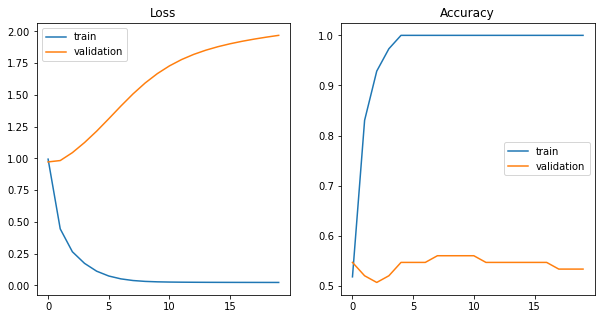

In [50]:
# Run this cell without changes

# Fit the model to the training data, using a subset of the
# training data as validation data
reg_model_results = model_with_regularization.fit(
    x=X_train,
    y=y_train,
    batch_size=None,
    epochs=20,
    verbose=0,
    validation_split=0.4,
    shuffle=False
)

plot_loss_and_accuracy(reg_model_results)

(Whether or not your regularization made a difference will partially depend on how strong of regularization you applied, as well as some random elements of your current TensorFlow configuration.)

Now we evaluate both models on the holdout set:

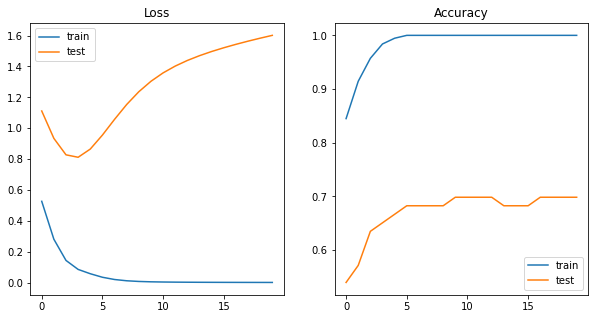

In [51]:
# Run this cell without changes

final_dense_model_results = dense_model.fit(
    x=X_train,
    y=y_train,
    batch_size=None,
    epochs=20,
    verbose=0,
    validation_data=(X_test, y_test),
    shuffle=False
)

plot_loss_and_accuracy(final_dense_model_results, final=True)

Plot the loss and accuracy your final regularized model.

Epoch 1/20
6/6 [==============================] - 0s 6ms/step - loss: 0.7870 - accuracy: 0.8128 - val_loss: 1.9471 - val_accuracy: 0.5079
Epoch 2/20
6/6 [==============================] - 0s 2ms/step - loss: 0.2013 - accuracy: 0.9358 - val_loss: 1.5754 - val_accuracy: 0.5873
Epoch 3/20
6/6 [==============================] - 0s 3ms/step - loss: 0.0830 - accuracy: 0.9840 - val_loss: 1.4692 - val_accuracy: 0.6032
Epoch 4/20
6/6 [==============================] - 0s 2ms/step - loss: 0.0716 - accuracy: 1.0000 - val_loss: 1.4973 - val_accuracy: 0.6032
Epoch 5/20
6/6 [==============================] - 0s 3ms/step - loss: 0.0604 - accuracy: 0.9947 - val_loss: 1.5872 - val_accuracy: 0.6190
Epoch 6/20
6/6 [==============================] - 0s 2ms/step - loss: 0.0447 - accuracy: 1.0000 - val_loss: 1.7046 - val_accuracy: 0.6190
Epoch 7/20
6/6 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 1.0000 - val_loss: 1.8210 - val_accuracy: 0.5873
Epoch 8/20
6/6 [==================

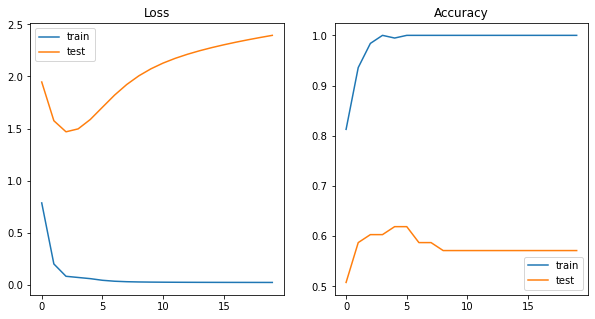

In [53]:
# Replace None, as necessary

final_reg_model_results = model_with_regularization.fit(
    x=X_train,
    y=y_train,
    batch_size=None,
    epochs=20,
    verbose=True,
    validation_data=(X_test, y_test),
    shuffle=False
)

plot_loss_and_accuracy(final_reg_model_results, final=True)